<a href="https://colab.research.google.com/github/lumimevi/Python_repository/blob/master/Vari%C3%A1veis_Aleat%C3%B3rias_Multidimensionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Variáveis Aleatórias Multidimensionais**

Lourdes Milagros Mendoza Villavicencio

# Questão Nº1

A distribuição de probabilidades conjuntas do número X de carros e do número Y de ônibus por ciclo de semáforo em uma conversão à esquerda proposta é exibida na tabela de probabilidade conjunta a seguir.


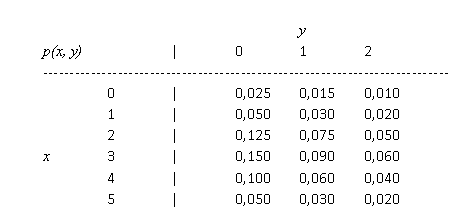

a. Qual é a probabilidade de haver exatamente um carro e exatamente um ônibus em um ciclo?

b. Qual é a probabilidade de haver no máximo um carro e no máximo um ônibus em um ciclo?

c. Qual é a probabilidade de haver exatamente um carro em um ciclo? E exatamente um ônibus?

d. Suponha que uma pista de conversão à esquerda tenha capacidade para cinco carros e um ônibus, equivalente a três carros. Qual é a probabilidade de excesso de fluxo em um ciclo?

e. X e Y são variáveis independentes? Explique.


 **Probabilidade Conjunta de Carros e Ônibus em um Semáforo**

 Vamos usar a tabela de probabilidade conjunta para responder às perguntas sobre carros (X) e ônibus (Y) em um ciclo de semáforo.


In [1]:
import pandas as pd
import numpy as np

print("--- 1. Probabilidade Conjunta de Carros e Ônibus em um Semáforo ---")

# Tabela de probabilidade conjunta p(x, y)
data = {
    '0': [0.025, 0.050, 0.125, 0.150, 0.100, 0.050],
    '1': [0.015, 0.030, 0.075, 0.090, 0.060, 0.030],
    '2': [0.010, 0.020, 0.050, 0.060, 0.040, 0.020]
}
index_x = [0, 1, 2, 3, 4, 5]
df_prob = pd.DataFrame(data, index=index_x)
df_prob.columns.name = 'y (ônibus)'
df_prob.index.name = 'x (carros)'

print("\nTabela de Probabilidade Conjunta p(x, y):")
print(df_prob)

# (a) Qual é a probabilidade de haver exatamente um carro e exatamente um ônibus em um ciclo?
# P(X=1, Y=1)
prob_a = df_prob.loc[1, '1']
print(f"\n(a) Probabilidade de exatamente um carro e exatamente um ônibus: {prob_a:.4f}")

# (b) Qual é a probabilidade de haver no máximo um carro e no máximo um ônibus em um ciclo?
# P(X <= 1, Y <= 1) = P(X=0, Y=0) + P(X=0, Y=1) + P(X=1, Y=0) + P(X=1, Y=1)
prob_b = df_prob.loc[0, '0'] + df_prob.loc[0, '1'] + \
         df_prob.loc[1, '0'] + df_prob.loc[1, '1']
print(f"(b) Probabilidade de no máximo um carro e no máximo um ônibus: {prob_b:.4f}")

# (c) Qual é a probabilidade de haver exatamente um carro em um ciclo? E exatamente um ônibus?
# P(X=1) = Soma de p(1, y) para todos os y
prob_x_eq_1 = df_prob.loc[1, :].sum()
print(f"\n(c) Probabilidade de exatamente um carro: {prob_x_eq_1:.4f}")

# P(Y=1) = Soma de p(x, 1) para todos os x
prob_y_eq_1 = df_prob.loc[:, '1'].sum()
print(f"    Probabilidade de exatamente um ônibus: {prob_y_eq_1:.4f}")

# (d) Suponha que uma pista de conversão à esquerda tenha capacidade para cinco carros e um ônibus,
# equivalente a três carros. Qual é a probabilidade de excesso de fluxo em um ciclo?
# Capacidade total em "equivalente a carros": 5 (carros) + 1 (ônibus) * 3 (equiv. carros/ônibus) = 5 + 3 = 8 carros
# Excesso de fluxo ocorre se o número total de "carros equivalentes" > 8.
# Carros Equivalentes (CE) = X + 3Y

prob_excesso_fluxo = 0
print("\n(d) Calculando a probabilidade de excesso de fluxo (X + 3Y > 8):")
for x in df_prob.index:
    for y in df_prob.columns:
        y_int = int(y) # Converte a string 'y' para int
        carros_equivalentes = x + 3 * y_int
        if carros_equivalentes > 8:
            prob_excesso_fluxo += df_prob.loc[x, y]
            print(f"    Cenário (X={x}, Y={y_int}): {carros_equivalentes} carros equivalentes (Excesso). Prob: {df_prob.loc[x, y]:.4f}")

print(f"Probabilidade de excesso de fluxo em um ciclo: {prob_excesso_fluxo:.4f}")


# (e) X e Y são variáveis independentes? Explique.
# Para X e Y serem independentes, p(x, y) = P(X=x) * P(Y=y) para todos os x e y.
# Primeiro, calcule as distribuições de probabilidade marginais para X e Y.
prob_marginal_x = df_prob.sum(axis=1)
prob_marginal_y = df_prob.sum(axis=0)

print("\n(e) Verificando a independência de X e Y:")
print("\nProbabilidade Marginal de X:")
print(prob_marginal_x)
print("\nProbabilidade Marginal de Y:")
print(prob_marginal_y)

independentes = True
for x in df_prob.index:
    for y_str in df_prob.columns:
        y_int = int(y_str)
        # Calcula P(X=x) * P(Y=y)
        produto_marginais = prob_marginal_x.loc[x] * prob_marginal_y.loc[y_str]
        # Compara com p(x, y)
        if not np.isclose(df_prob.loc[x, y_str], produto_marginais, atol=1e-9): # Use np.isclose para lidar com pontos flutuantes
            print(f"    Para X={x}, Y={y_int}:")
            print(f"      p(x, y) = {df_prob.loc[x, y_str]:.4f}")
            print(f"      P(X=x) * P(Y=y) = {prob_marginal_x.loc[x]:.4f} * {prob_marginal_y.loc[y_str]:.4f} = {produto_marginais:.4f}")
            print(f"      Os valores não são iguais. Portanto, X e Y NÃO são independentes.")
            independentes = False
            break
    if not independentes:
        break

if independentes:
    print("\n    Todos os p(x, y) são iguais a P(X=x) * P(Y=y). Portanto, X e Y são independentes.")
else:
    print("\n    **Conclusão: X e Y NÃO são variáveis independentes.**")
    print("    Isso é demonstrado pelo fato de que p(x, y) não é igual ao produto P(X=x) * P(Y=y) para todas as combinações de x e y.")
    print("    Por exemplo, para X=0, Y=0:")
    print(f"    p(0, 0) = {df_prob.loc[0, '0']:.4f}")
    print(f"    P(X=0) * P(Y=0) = {prob_marginal_x.loc[0]:.4f} * {prob_marginal_y.loc['0']:.4f} = {(prob_marginal_x.loc[0] * prob_marginal_y.loc['0']):.4f}")
    print(f"    Como {df_prob.loc[0, '0']:.4f} é diferente de {(prob_marginal_x.loc[0] * prob_marginal_y.loc['0']):.4f}, a independência não se sustenta.")

--- 1. Probabilidade Conjunta de Carros e Ônibus em um Semáforo ---

Tabela de Probabilidade Conjunta p(x, y):
y (ônibus)      0      1     2
x (carros)                    
0           0.025  0.015  0.01
1           0.050  0.030  0.02
2           0.125  0.075  0.05
3           0.150  0.090  0.06
4           0.100  0.060  0.04
5           0.050  0.030  0.02

(a) Probabilidade de exatamente um carro e exatamente um ônibus: 0.0300
(b) Probabilidade de no máximo um carro e no máximo um ônibus: 0.1200

(c) Probabilidade de exatamente um carro: 0.1000
    Probabilidade de exatamente um ônibus: 0.3000

(d) Calculando a probabilidade de excesso de fluxo (X + 3Y > 8):
    Cenário (X=3, Y=2): 9 carros equivalentes (Excesso). Prob: 0.0600
    Cenário (X=4, Y=2): 10 carros equivalentes (Excesso). Prob: 0.0400
    Cenário (X=5, Y=2): 11 carros equivalentes (Excesso). Prob: 0.0200
Probabilidade de excesso de fluxo em um ciclo: 0.1200

(e) Verificando a independência de X e Y:

Probabilidade Marginal

# Questão Nº2

Você tem duas lâmpadas para uma determinada luminária. Seja X = vida útil da primeira lâmpada e Y =  vida útil da segunda lâmpada (ambas de mil horas). Suponha que X e Y sejam independentes e que cada uma tenha distribuição exponencial com parâmetro λ =  1.

a. Qual é a fdp conjunta de X e Y?

b. Qual é a probabilidade de cada lâmpada durar no máximo 1000 horas (isso é, X <= 1 e Y <= 1)?

c. Qual é a probabilidade de a vida útil total das duas lâmpadas ser no máximo 2?

[Sugestão: desenhe a região
A = {(x, y): x >= 0, y >= 0, x + y <= 2} antes da integração.]

d. Qual é a probabilidade de a vida útil total estar entre 1 e 2?


**Vida Útil de Lâmpadas (Distribuição Exponencial Conjunta)**

Este problema trata da distribuição exponencial, com foco na distribuição conjunta de duas variáveis independentes.

In [2]:
import sympy
from sympy import exp, integrate, oo, Symbol

print("\n--- 2. Vida Útil de Lâmpadas ---")

# Parâmetros da distribuição exponencial
lambda_param = 1
# Para scipy.stats.expon, scale = 1/lambda
scale_param = 1 / lambda_param

# (a) Qual é a fdp conjunta de X e Y?
print("\n(a) A função densidade de probabilidade (fdp) conjunta de X e Y:")
print(f"Como X e Y são independentes, a fdp conjunta f(x, y) = f_X(x) * f_Y(y).")
print(f"Para uma distribuição exponencial com λ = {lambda_param}, a fdp é f(t) = λ * e^(-λt) para t >= 0.")
print(f"Portanto, f(x) = {lambda_param} * e^(-{lambda_param}x) para x >= 0")
print(f"E f(y) = {lambda_param} * e^(-{lambda_param}y) para y >= 0")
print(f"Assim, a fdp conjunta f(x, y) = ({lambda_param} * e^(-{lambda_param}x)) * ({lambda_param} * e^(-{lambda_param}y))")
print(f"f(x, y) = {lambda_param**2} * e^(-{lambda_param}(x + y)) para x >= 0, y >= 0, e 0 caso contrário.")
print(f"Neste caso, f(x, y) = 1 * e^(-(x + y)) para x >= 0, y >= 0.")

# (b) Qual é a probabilidade de cada lâmpada durar no máximo 1000 horas (isso é, X <= 1 e Y <= 1)?
# P(X <= 1 e Y <= 1) = P(X <= 1) * P(Y <= 1) devido à independência
# Para uma exponencial, P(X <= x_0) = 1 - e^(-lambda * x_0)

prob_x_le_1 = 1 - np.exp(-lambda_param * 1)
prob_y_le_1 = 1 - np.exp(-lambda_param * 1) # Igual a prob_x_le_1

prob_ambas_le_1 = prob_x_le_1 * prob_y_le_1
print(f"\n(b) Probabilidade de cada lâmpada durar no máximo 1000 horas (X <= 1 e Y <= 1): {prob_ambas_le_1:.4f}")

# (c) Qual é a probabilidade de a vida útil total das duas lâmpadas ser no máximo 2?
# P(X + Y <= 2)
# Integral dupla da fdp conjunta sobre a região A = {(x, y): x >= 0, y >= 0, x + y <= 2}
# Integral de 0 a 2 para x, e de 0 a (2-x) para y.
# f(x, y) = e^(-(x+y))

x_sym, y_sym = Symbol('x'), Symbol('y')
integrand = exp(-(x_sym + y_sym))

# Integral interna com respeito a y
integral_y = integrate(integrand, (y_sym, 0, 2 - x_sym))
# Integral externa com respeito a x
prob_total_le_2 = integrate(integral_y, (x_sym, 0, 2))

print(f"\n(c) Probabilidade de a vida útil total das duas lâmpadas ser no máximo 2 (X + Y <= 2): {prob_total_le_2:.4f}")

# (d) Qual é a probabilidade de a vida útil total estar entre 1 e 2?
# P(1 < X + Y < 2) = P(X + Y <= 2) - P(X + Y <= 1)

# Calcular P(X + Y <= 1)
# Integral de 0 a 1 para x, e de 0 a (1-x) para y.
integral_y_le_1 = integrate(integrand, (y_sym, 0, 1 - x_sym))
prob_total_le_1 = integrate(integral_y_le_1, (x_sym, 0, 1))

prob_total_entre_1_e_2 = prob_total_le_2 - prob_total_le_1
print(f"\n(d) Probabilidade de a vida útil total estar entre 1 e 2: {prob_total_entre_1_e_2:.4f}")


--- 2. Vida Útil de Lâmpadas ---

(a) A função densidade de probabilidade (fdp) conjunta de X e Y:
Como X e Y são independentes, a fdp conjunta f(x, y) = f_X(x) * f_Y(y).
Para uma distribuição exponencial com λ = 1, a fdp é f(t) = λ * e^(-λt) para t >= 0.
Portanto, f(x) = 1 * e^(-1x) para x >= 0
E f(y) = 1 * e^(-1y) para y >= 0
Assim, a fdp conjunta f(x, y) = (1 * e^(-1x)) * (1 * e^(-1y))
f(x, y) = 1 * e^(-1(x + y)) para x >= 0, y >= 0, e 0 caso contrário.
Neste caso, f(x, y) = 1 * e^(-(x + y)) para x >= 0, y >= 0.

(b) Probabilidade de cada lâmpada durar no máximo 1000 horas (X <= 1 e Y <= 1): 0.3996

(c) Probabilidade de a vida útil total das duas lâmpadas ser no máximo 2 (X + Y <= 2): 0.5940

(d) Probabilidade de a vida útil total estar entre 1 e 2: 0.3298


# Questão Nº3

Considere uma pequena balsa que possa acomodar carros e ônibus. O pedágio para carros são R$ 30, e para ônibus, R$ 100. Sejam X e Y o número de carros e ônibus, respectivamente, levado em uma única viagem. Suponha que a distribuição conjunta de X e Y seja aquela dada na tabela do Exercício 1. Calcule a receita esperada de uma única viagem.


**Receita Esperada da Balsa**

Vamos usar a tabela de probabilidade conjunta do Exercício 1 e os pedágios para calcular a receita esperada.

In [3]:
import pandas as pd
import numpy as np

print("\n--- 3. Receita Esperada da Balsa ---")

# Tabela de probabilidade conjunta p(x, y) (a mesma do Exercício 1)
data = {
    '0': [0.025, 0.050, 0.125, 0.150, 0.100, 0.050],
    '1': [0.015, 0.030, 0.075, 0.090, 0.060, 0.030],
    '2': [0.010, 0.020, 0.050, 0.060, 0.040, 0.020]
}
index_x = [0, 1, 2, 3, 4, 5]
df_prob = pd.DataFrame(data, index=index_x)
df_prob.columns.name = 'y (ônibus)'
df_prob.index.name = 'x (carros)'

# Pedágios
pedagio_carro = 30 # R$
pedagio_onibus = 100 # R$

# A receita R é uma função de X e Y: R = 30X + 100Y
# A receita esperada E[R] = E[30X + 100Y] = Sum_x Sum_y (30x + 100y) * p(x, y)

receita_esperada = 0
for x in df_prob.index:
    for y_str in df_prob.columns:
        y_int = int(y_str)
        prob_xy = df_prob.loc[x, y_str]
        receita_xy = (pedagio_carro * x) + (pedagio_onibus * y_int)
        receita_esperada += receita_xy * prob_xy
        # print(f"  X={x}, Y={y_int}, Receita={receita_xy}, Prob={prob_xy:.4f}, Contribuição={receita_xy * prob_xy:.4f}")

print(f"Receita esperada de uma única viagem: R$ {receita_esperada:.2f}")


--- 3. Receita Esperada da Balsa ---
Receita esperada de uma única viagem: R$ 154.00
